In [1]:
import pandas as pd
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.utils import shuffle           
from tqdm import tqdm

In [2]:
class_names = ['downdog', 'goddess', 'plank', 'tree', 'warrior2']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

IMAGE_SIZE = (150,150)

In [3]:
def load_data():
   
    datasets = ["../input/yoga-poses/Train", "../input/yoga-poses/Test"]
    output = []
    
    # Iterate through the training and test set.
    for dataset in datasets:
        
        images = [] 
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each Subfolder corresponding to a category  
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Image path should be obtained
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv.imread(img_path)
                image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
                image = cv.resize(image, IMAGE_SIZE) 
                
                # Append the image along with its label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')
        
        # Shuffle the images to introduce some randomness in our data
        images, labels = shuffle(images, labels)
        
        
        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading ../input/yoga-poses/Train


100%|██████████| 140/140 [00:02<00:00, 46.79it/s]


Loading ../input/yoga-poses/Test


100%|██████████| 7/7 [00:00<00:00, 85.38it/s]


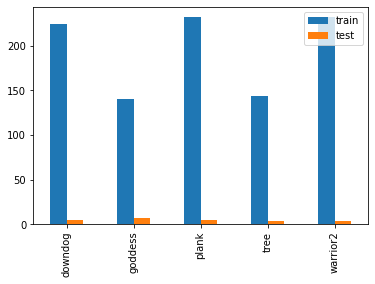

In [5]:
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,'test': test_counts}, index=class_names).plot.bar()
plt.show()

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('sigmoid'))


2022-09-07 06:33:14.218371: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-07 06:33:14.373966: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-07 06:33:14.374804: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-07 06:33:14.375854: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       7

In [9]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_images, train_labels, batch_size = 28, epochs=15, validation_split = 0.3)

2022-09-07 06:33:18.042440: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-09-07 06:33:19.364450: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


25/25 [==============================] - 8s 37ms/step - loss: 1.6112 - accuracy: 0.2529 - val_loss: 1.5871 - val_accuracy: 0.2363
Epoch 2/15
25/25 [==============================] - 0s 17ms/step - loss: 1.5636 - accuracy: 0.2897 - val_loss: 1.4775 - val_accuracy: 0.3699
Epoch 3/15
25/25 [==============================] - 0s 17ms/step - loss: 1.4767 - accuracy: 0.3397 - val_loss: 1.3988 - val_accuracy: 0.4247
Epoch 4/15
25/25 [==============================] - 0s 16ms/step - loss: 1.3615 - accuracy: 0.4059 - val_loss: 1.3121 - val_accuracy: 0.4795
Epoch 5/15
25/25 [==============================] - 0s 17ms/step - loss: 1.2988 - accuracy: 0.4559 - val_loss: 1.1666 - val_accuracy: 0.5925
Epoch 6/15
25/25 [==============================] - 0s 16ms/step - loss: 1.1165 - accuracy: 0.5544 - val_loss: 1.0433 - val_accuracy: 0.6199
Epoch 7/15
25/25 [==============================] - 0s 16ms/step - loss: 1.0043 - accuracy: 0.6162 - val_loss: 0.8967 - val_accuracy: 0.6712
Epoch 8/15
25/25 [======

# To visualize how our model is performing, we plot the accuracy and the loss during the training

In [11]:
def plot_performance(history):

    fig = plt.figure(figsize=(15,8))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("Training_accuracy vs Validation_accuracy")
    plt.ylabel("ACCURACY")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss_function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("Training_loss vs Validation_loss")
    plt.ylabel("LOSS")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

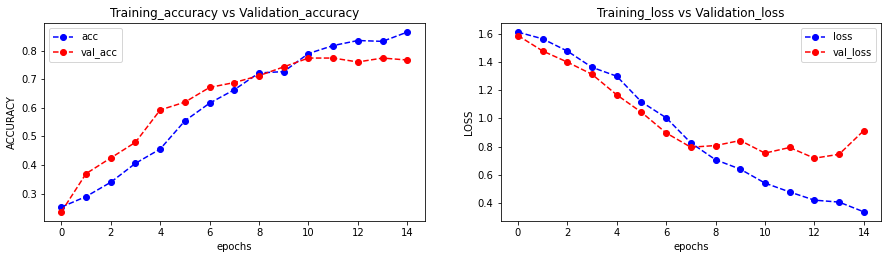

In [12]:
plot_performance(history)

# **The model is not perfect as we can clearly observe the Validation loss slightly flattening though the training loss is going down and the accuracy of the model is improving.
# Reason could be insufficient training data and hence it could be improved by adding more training data.

In [13]:
test_loss = model.evaluate(test_images, test_labels)

1/1 [==============================] - 0s 109ms/step - loss: 1.2057 - accuracy: 0.7200


# We now make predictions on the test data set.

In [14]:
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions,axis=1)  # np.argmax is used since each prediction would be an array of...
                                             # probabilities and we need to pick the max value. 
pred_labels

array([2, 4, 1, 3, 4, 2, 1, 0, 0, 4, 4, 3, 1, 0, 0, 2, 0, 1, 0, 4, 1, 2,
       3, 2, 3])

# Plotting the images along with their actual class and predicted class would give us a proper idea about how our model is making predictions.

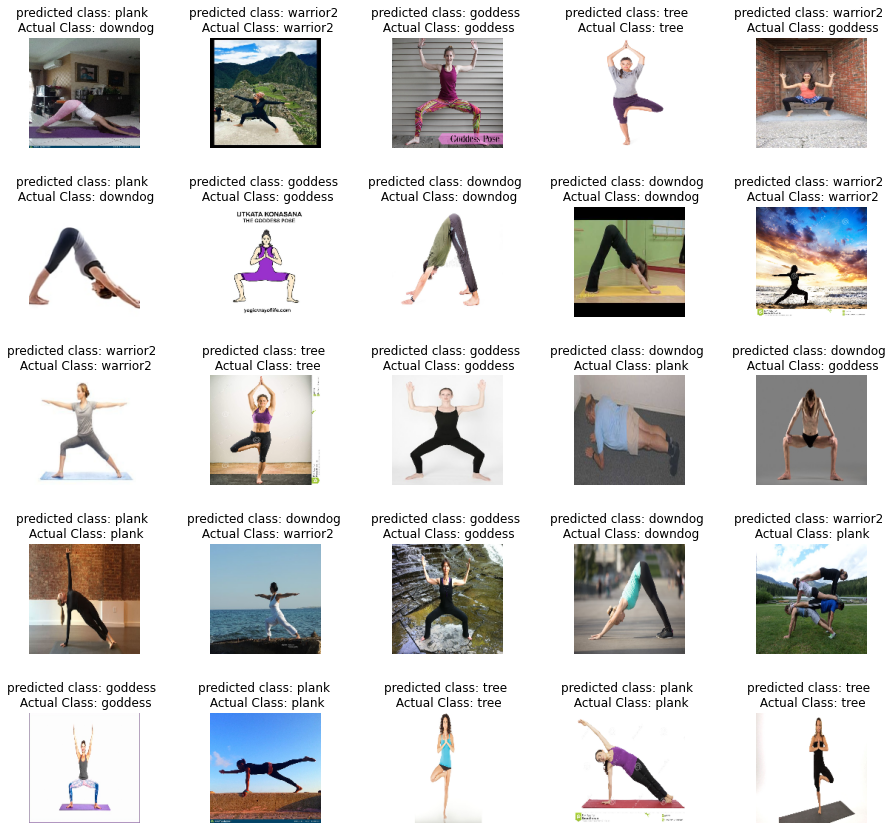

In [15]:
fig, ax = plt.subplots(5,5, figsize = (15,15))
ax = ax.ravel()

for i in range(0,25):  
    ax[i].imshow(test_images[i])
    ax[i].set_title(f"predicted class: {class_names[pred_labels[i]]} \n Actual Class: {class_names[test_labels[i]]}")
    ax[i].axis('off')
plt.subplots_adjust(wspace=0.65)

# A basic CNN model is created, Any suggestions to improve the model are welcome.